In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import numpy as np
import time
import random
import statistics as sts
from scipy.stats.mstats import gmean
from scipy import stats

import tensorflow as tf
from tensorflow.keras import backend as Bkd
from tensorflow.keras.layers import Lambda

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D,Flatten, MaxPooling1D, Activation, GRU, Input
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import backend as K
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.compat.v1.random import set_random_seed

import math

from sklearn.preprocessing import MinMaxScaler

from keras.layers import TimeDistributed
from keras.backend import sigmoid

from keras.models import Sequential

plt.style.use('fivethirtyeight')

WIND = 70
BATCH = 40
EPOCH = 30
UNIT = 150

print('-------------------------------------------------')
print('Window size = ',WIND)
print('Batch  size = ',BATCH)
print('Epochs      = ',EPOCH)
print('LSTM Units  = ',UNIT)
print('-------------------------------------------------')

df = pd.read_csv('/content/drive/MyDrive/EUR-USD/M_30/M_30_EUR_USD.csv', index_col=0)



df

-------------------------------------------------
Window size =  70
Batch  size =  40
Epochs      =  30
LSTM Units  =  150
-------------------------------------------------


,Local time,Open,High,Low,Close,Volume
0,01.01.2015 00:00:00.000 GMT+0330,1.20972,1.21009,1.20972,1.21007,1354.75
1,01.01.2015 00:30:00.000 GMT+0330,1.21005,1.21008,1.20978,1.20980,905.82
2,01.01.2015 01:00:00.000 GMT+0330,1.20980,1.20999,1.20969,1.20971,923.69
3,01.01.2015 01:30:00.000 GMT+0330,1.20969,1.20976,1.20969,1.20976,1.50
4,01.01.2015 02:00:00.000 GMT+0330,1.20976,1.20976,1.20976,1.20976,0.00
...,...,...,...,...,...,...
52651,31.12.2020 21:30:00.000 GMT+0330,1.22251,1.22279,1.22180,1.22222,2590.06
52652,31.12.2020 22:00:00.000 GMT+0330,1.22221,1.22221,1.22149,1.22166,1730.50
52653,31.12.2020 22:30:00.000 GMT+0330,1.22166,1.22199,1.22101,1.22194,1745.57
52654,31.12.2020 23:00:00.000 GMT+0330,1.22194,1.22228,1.22091,1.22098,1912.77


In [ ]:
df = df.drop(columns='Local time')
df = df.drop(columns='Volume')

In [ ]:
df = np.array(df)

df = pd.DataFrame(df)

trainsize=int(len(df)*0.8)
testsize=len(df)-trainsize

Total_len = len(df)
Train_len = Total_len - testsize
Test_len = Total_len - Train_len
Train = df.head(n = Train_len)
Test = df.tail(n = Test_len)

In [ ]:
P = ((Train[Train.columns[0]] + Train[Train.columns[1]] + Train[Train.columns[2]] + Train[Train.columns[3]]) / 4)

type(P)

P1 = np.array(P)

print(type(P))
print(type(P1))

m = stats.mode(P1)
print(m)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
ModeResult(mode=array([1.08818]), count=array([193]))


<ipython-input-5-9fb245cd35f5>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m = stats.mode(P1)


In [ ]:
    MODE = 1229.99
    H_MEAN = sts.harmonic_mean(P)
    G_MEAN = gmean(P)
    VAR = sts.stdev(P)
    Train_Min = min(Train.min())
    Train_Max = max(Train.max())
    print('mode= ', MODE)
    print('min = ', Train_Min)
    print('Max = ', Train_Max)

    print('Harmonic Avg. = ', H_MEAN)
    print('Geometric Mean = ', G_MEAN)

ColList=range(4)
ColList = list(ColList)

    DF_std = Train.copy()
    DF_Mode =Train.copy()
    DF_HM = Train.copy()
    DF_GM = Train.copy()
    DF_temp = (Train.iloc[:, ColList] - Train_Min) / (Train_Max - Train_Min)
    DF_std[ColList] = DF_temp
    Train_std = DF_std[ColList]
    DF_temp = (Test.iloc[:, ColList] - MODE) / (Train_Max - Train_Min)
    DF_Mode[ColList] = DF_temp
    Train_Mode = DF_Mode[ColList]
    DF_temp = (Train.iloc[:, ColList] - H_MEAN) / (Train_Max - Train_Min)
    DF_HM[ColList] = DF_temp
    Train_HM = DF_HM[ColList]
    DF_temp = (Train.iloc[:, ColList] - G_MEAN) / ( - Train_Min)
    DF_GM[ColList] = DF_temp
    Train_GM = DF_GM[ColList]

    DF_std = Test.copy()
    DF_Mode = Test.copy()
    DF_HM = Test.copy()
    DF_GM = Test.copy()
    DF_temp = (Test.iloc[:, ColList] - Train_Min) / (Train_Max - Train_Min)
    DF_std[ColList] = DF_temp
    Test_std = DF_std[ColList]
    DF_temp = (Test.iloc[:, ColList] - MODE) / (Train_Max - Train_Min)
    DF_Mode[ColList] = DF_temp
    Test_Mode = DF_Mode[ColList]
    DF_temp = (Test.iloc[:, ColList] - H_MEAN) / (Train_Max - Train_Min)
    DF_HM[ColList] = DF_temp
    Test_HM = DF_HM[ColList]
    DF_temp = (Test.iloc[:, ColList] - G_MEAN) / ( - Train_Min)
    DF_GM[ColList] = DF_temp
    Test_GM = DF_GM[ColList]

    DF_df = df.copy()
    DF_temp = (df.iloc[:, ColList] - G_MEAN) / ( - Train_Min)
    DF_df[ColList] = DF_temp
    df_prime = DF_df[ColList]

Train_MinMax = Train_std * (Train_Max - Train_Min) + Train_Min
Train_M_MinMax = Train_Mode * (Train_Max - Train_Min) + Train_Min
Train_H_MinMax = Train_HM * (Train_Max - Train_Min) + Train_Min
Train_G_MinMax = Train_GM * (Train_Max - Train_Min) + Train_Min

Test_MinMax = Test_std * (Train_Max - Train_Min) + Train_Min
Test_M_MinMax = Test_Mode * (Train_Max - Train_Min) + Train_Min
Test_H_MinMax = Test_HM * (Train_Max - Train_Min) + Train_Min
Test_G_MinMax = Test_GM * (Train_Max - Train_Min) + Train_Min

mode=  1229.99
min =  1.03403
Max =  1.25553
Harmonic Avg. =  1.1286782025765296
Geometric Mean =  1.1295072574930214


In [ ]:
Train_std = np.array(Train_std)
Test_std = np.array(Test_std)

In [ ]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i+time_step, :])
    return np.array(dataX), np.array(dataY)


In [ ]:
Train_std.shape

type(Train_std)

numpy.ndarray

In [ ]:
xtrain, ytrain = create_dataset(Train_std, WIND)
xtest, ytest = create_dataset(Test_std, WIND)

In [ ]:
xtest = xtest[:450]
ytest = ytest[:450]

In [ ]:
#def swish(x, beta = 1):
#   return (x * sigmoid(beta * x))
#from keras.utils.generic_utils import get_custom_objects
#from keras.layers import Activation
#get_custom_objects().update({'swish': Activation(swish)})


from keras import backend as K
from keras.models import Model
from keras.layers import Input, Lambda
from keras.optimizers import Nadam

def FLF(yTrue, yPred):

  lam = 0.1
  v   = Lambda(lambda x: x*0.9)((yTrue-yPred))
  vn  = Lambda(lambda x: x*lam)(K.abs((yTrue[:,1]+yTrue[:,2])/2 - (yPred[:,1]+yPred[:,2])/2))
  vn1 = Lambda(lambda x: x*lam)(K.abs((yTrue[:,0]+yTrue[:,3])/2 - (yPred[:,0]+yPred[:,3])/2))
  vx  = K.square((v[:,0]-vn1))
  vy  = K.square((v[:,1]-vn))
  vz  = K.square((v[:,2]-vn))
  v4  = K.square((v[:,3]-vn1))
  vm  = K.concatenate([vx, vy, vz, v4])
  vmx = K.mean(vm)
  return vmx



tf.keras.utils.get_custom_objects()['FLF'] = FLF

In [ ]:
xtrain.shape

(84141, 70, 4)

In [ ]:
from keras.optimizers import Nadam
# Define the input layer
input_shape = (xtrain.shape[1], xtrain.shape[2])
inputs = Input(shape=input_shape)

# Create the CNN model
modelcnn = Sequential()
modelcnn.add(Conv1D(256, 2, input_shape=input_shape, padding='same'))
modelcnn.add(Flatten())
modelcnn.add(Dense(xtrain.shape[2]))
modelcnn.add(Activation('linear'))
modelcnn.build((None, xtrain.shape[1], xtrain.shape[2]))

# Define the optimizer
opt = Nadam(learning_rate=0.0001, beta_1=0.7, beta_2=0.025, epsilon=None)
# Register the custom loss function
with tf.keras.utils.custom_object_scope({'FLF': FLF}):
    modelcnn.compile(optimizer=opt, loss='FLF')
print(modelcnn.summary())
print('--------------------------------------------------------------------------------------')

print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
# Create the LSTM model
modellstm = Sequential()
modellstm.add(LSTM(256,activation= 'tanh', input_shape=input_shape))
#model.add(LSTM(300,activation= 'tanh',return_sequences=True))
#model.add(LSTM(150,activation= 'tanh'))
modellstm.add(Dense(units= 4, activation='linear'))
opt = Nadam(lr=0.0001, beta_1=0.7, beta_2=0.025, epsilon=None, schedule_decay=0.0004)
with tf.keras.utils.custom_object_scope({'FLF': FLF}):
    modellstm.compile(optimizer=opt, loss='FLF')
print(modellstm.summary())
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
# Create the GRU model
modelgru = Sequential()
modelgru.add(GRU(256,activation= 'tanh' , input_shape=input_shape))
#model.add(GRU(300,activation= 'tanh',return_sequences=True))
#model.add(GRU(150,activation= 'tanh'))
modelgru.add(Dense(units= 4, activation='linear'))
opt = Nadam(lr=0.0001, beta_1=0.7, beta_2=0.025, epsilon=None, schedule_decay=0.0004)
with tf.keras.utils.custom_object_scope({'FLF': FLF}):
    modelgru.compile(optimizer=opt, loss='FLF')
print(modelgru.summary())
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')

modelcnn.fit(xtrain, ytrain, epochs=EPOCH, batch_size=40, validation_data=(xtest, ytest))
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')


accuracy=modelcnn.evaluate(xtest,ytest)
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print(accuracy)






print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')

modellstm.fit(xtrain, ytrain, epochs=EPOCH, batch_size=5, validation_data=(xtest, ytest))
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')


accuracy=modellstm.evaluate(xtest,ytest)
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print(accuracy)





print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')

modelgru.fit(xtrain, ytrain, epochs=EPOCH, batch_size=40, validation_data=(xtest, ytest))
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')


accuracy=modelgru.evaluate(xtest,ytest)
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print(accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 70, 256)           2304      
                                                                 
 flatten (Flatten)           (None, 17920)             0         
                                                                 
 dense (Dense)               (None, 4)                 71684     
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 73,988
Trainable params: 73,988
Non-trainable params: 0
_________________________________________________________________
None
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
-----

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               201216    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 202,244
Trainable params: 202,244
Non-trainable params: 0
_________________________________________________________________
None
--------------------------------------------------------------------------------------

In [ ]:
test_predcnn = modelcnn.predict(xtest)
test_predlstm = modellstm.predict(xtest)
test_predgru = modelgru.predict(xtest)


print(test_predcnn.shape)
print(test_predlstm.shape)
print(test_predgru.shape)
print(ytest.shape)


15/15 [==============================] - 0s 2ms/step
(450, 4)
(450, 4)
(450, 4)
(450, 4)


In [ ]:
ytest_rescale = ytest * (Train_Max - Train_Min) + Train_Min

Test_Pred_MinMaxcnn = test_predcnn * (Train_Max - Train_Min) + Train_Min

Test_Pred_MinMaxlstm = test_predlstm * (Train_Max - Train_Min) + Train_Min

Test_Pred_MinMaxgru = test_predgru * (Train_Max - Train_Min) + Train_Min

In [ ]:
print('-------------------------------------------------------------')
print(type(Test_Pred_MinMaxcnn))
print(Test_Pred_MinMaxlstm.shape)
print('-------------------------------------------------------------')
print(type(Test_Pred_MinMaxcnn))
print(Test_Pred_MinMaxcnn.shape)

Test_MinMax = np.array(Test_MinMax)

Test_MinMax = Test_MinMax[:450]

print(df.shape)
print(Test_Pred_MinMaxlstm.shape)
print(ytest.shape)
print(Test_Pred_MinMaxgru.shape)

print(Test_MinMax.shape)

-------------------------------------------------------------
<class 'numpy.ndarray'>
(450, 4)
-------------------------------------------------------------
<class 'numpy.ndarray'>
(450, 4)
(105264, 4)
(450, 4)
(450, 4)
(450, 4)
(450, 4)


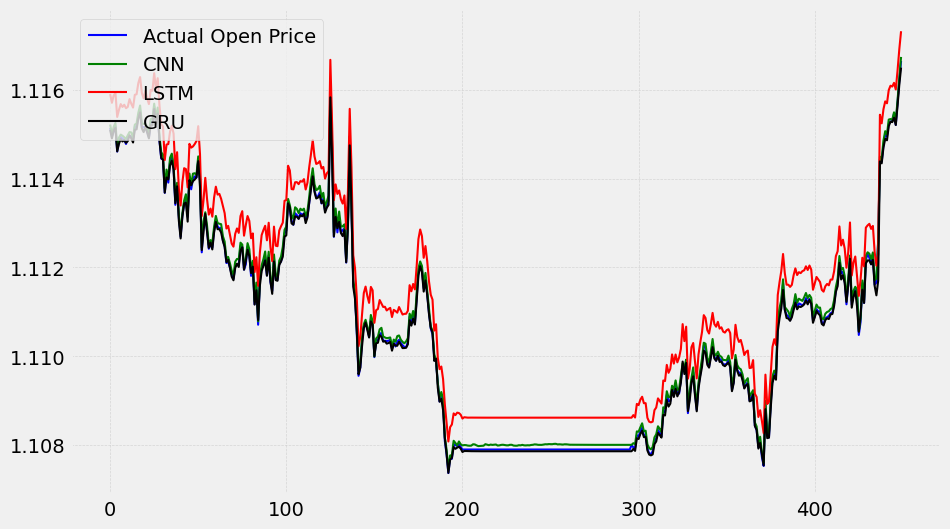

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


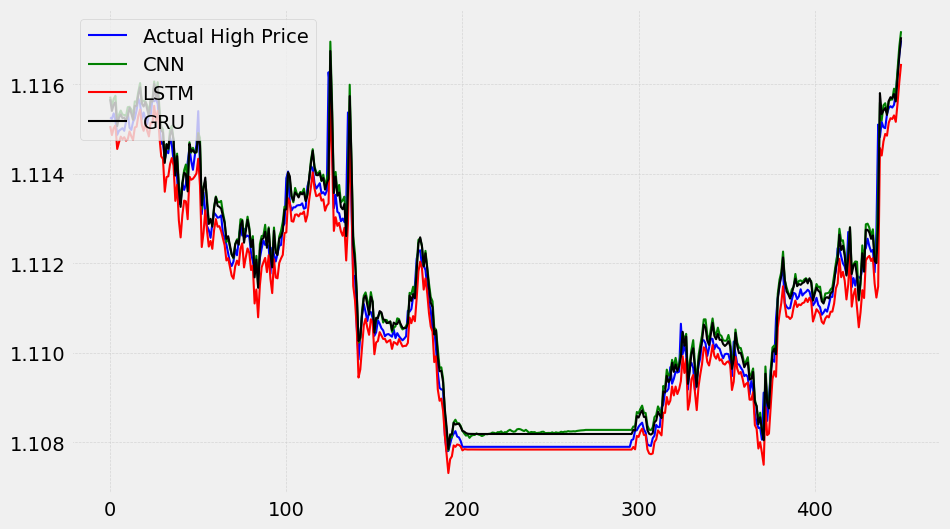

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


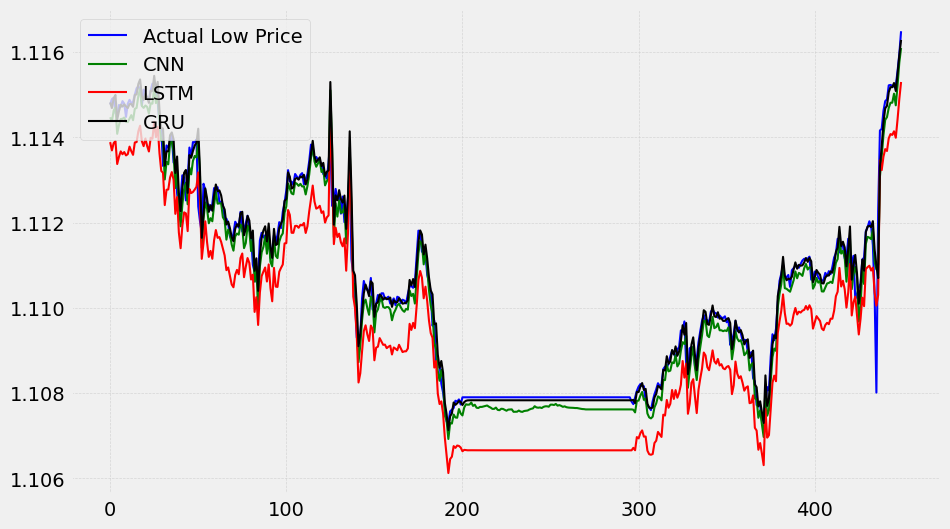

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


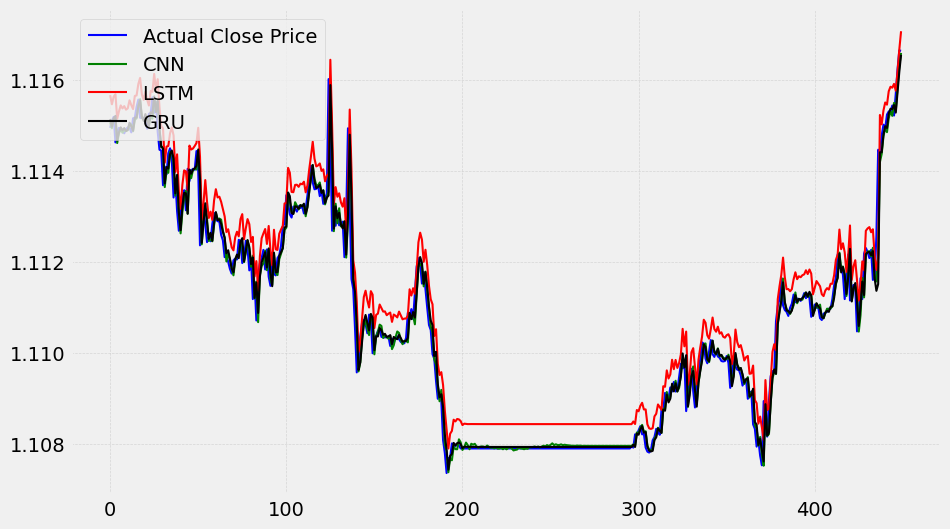

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(ytest_rescale[(len(ytest_rescale)-450):,0],'blue', linewidth=1.5)
plt.plot(Test_Pred_MinMaxcnn[(len(Test_Pred_MinMaxcnn)-450):,0],'green', linewidth=1.5)
plt.plot(Test_Pred_MinMaxlstm[(len(Test_Pred_MinMaxlstm)-450):,0],'red', linewidth=1.5)
plt.plot(Test_Pred_MinMaxgru[(len(Test_Pred_MinMaxgru)-450):,0],'black', linewidth=1.5)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,1],'g')
plt.legend(('Actual Open Price', 'CNN', 'LSTM', 'GRU'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#plt.title("Open EURUSD + CNN")
plt.show()
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

plt.figure(figsize=(10,6))

plt.plot(ytest_rescale[(len(ytest_rescale)-450):,1],'blue', linewidth=1.5)
plt.plot(Test_Pred_MinMaxcnn[(len(Test_Pred_MinMaxcnn)-450):,1],'green', linewidth=1.5)
plt.plot(Test_Pred_MinMaxlstm[(len(Test_Pred_MinMaxlstm)-450):,1],'red', linewidth=1.5)
plt.plot(Test_Pred_MinMaxgru[(len(Test_Pred_MinMaxgru)-450):,1],'black', linewidth=1.5)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,1],'g')
plt.legend(('Actual High Price', 'CNN', 'LSTM', 'GRU'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#plt.title("HIGH EURUSD + CNN")
plt.show()
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
plt.figure(figsize=(10,6))

plt.plot(ytest_rescale[(len(ytest_rescale)-450):,2],'blue', linewidth=1.5)
plt.plot(Test_Pred_MinMaxcnn[(len(Test_Pred_MinMaxcnn)-450):,2],'green', linewidth=1.5)
plt.plot(Test_Pred_MinMaxlstm[(len(Test_Pred_MinMaxlstm)-450):,2],'red', linewidth=1.5)
plt.plot(Test_Pred_MinMaxgru[(len(Test_Pred_MinMaxgru)-450):,2],'black', linewidth=1.5)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,1],'g')
plt.legend(('Actual Low Price', 'CNN', 'LSTM', 'GRU'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#plt.title("HIGH EURUSD + CNN")
plt.show()

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

plt.figure(figsize=(10,6))

plt.plot(ytest_rescale[(len(ytest_rescale)-450):,3],'blue', linewidth=1.5)
plt.plot(Test_Pred_MinMaxcnn[(len(Test_Pred_MinMaxcnn)-450):,3],'green', linewidth=1.5)
plt.plot(Test_Pred_MinMaxlstm[(len(Test_Pred_MinMaxlstm)-450):,3],'red', linewidth=1.5)
plt.plot(Test_Pred_MinMaxgru[(len(Test_Pred_MinMaxgru)-450):,3],'black', linewidth=1.5)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,1],'g')
plt.legend(('Actual Close Price', 'CNN', 'LSTM', 'GRU'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#plt.title("HIGH EURUSD + CNN")
plt.show()